In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Detect and Remove Outliers

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: xlabel='price_per_sqft', ylabel='Density'>

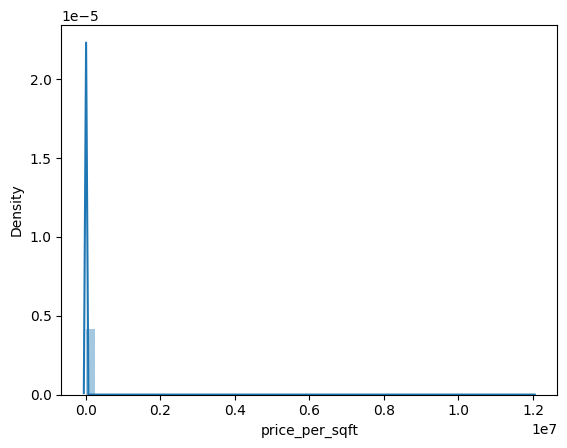

In [4]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

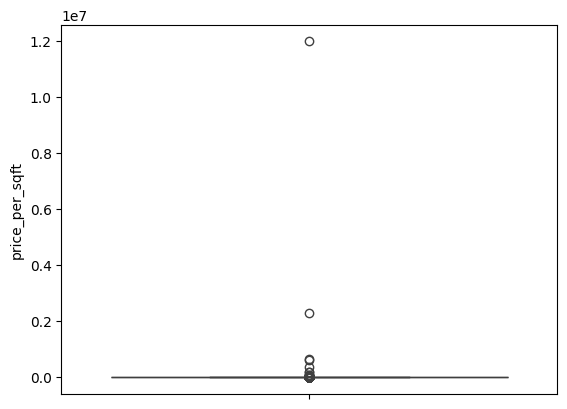

In [5]:
# to see outliers clearly
sns.boxplot(df['price_per_sqft']) 

### Z-score method

In [6]:
upper_limit = df['price_per_sqft'].mean() + 3*df['price_per_sqft'].std()
lower_limit = df['price_per_sqft'].mean() - 3*df['price_per_sqft'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 328101.8177267502
lower limit: -312261.14424190175


In [7]:
# find the outliers
df.loc[(df['price_per_sqft']  > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [8]:
# trimming - delete the outlier data
new_df = df.loc[(df['price_per_sqft']  < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df)-len(new_df))

old data: 13200
new data: 13195
outliers: 5


<Axes: ylabel='price_per_sqft'>

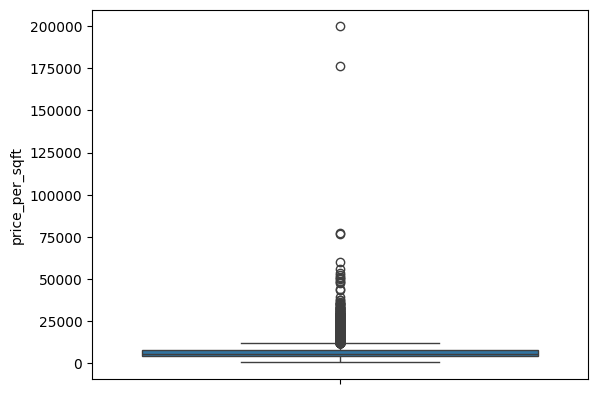

In [9]:
sns.boxplot(new_df['price_per_sqft'])

In [10]:
# capping - change the outlier valuesto upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['price_per_sqft']>upper_limit), 'price_per_sqft'] = upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit), 'price_per_sqft'] = lower_limit
print(new_df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

<Axes: ylabel='price_per_sqft'>

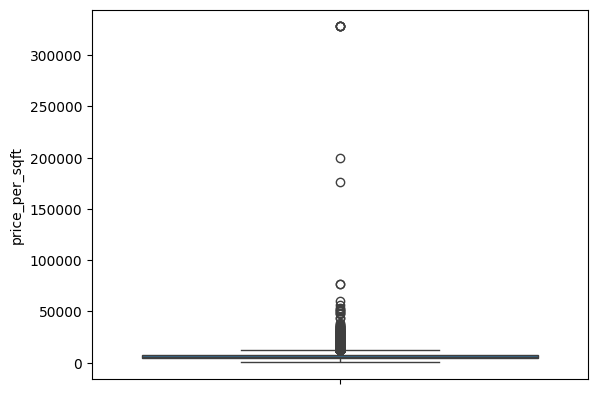

In [11]:
sns.boxplot(new_df['price_per_sqft'])

In [12]:
len(new_df)

13200

## IQR method

In [13]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr = q3-q1

In [14]:
q1, q3, iqr

(4267.0, 7317.0, 3050.0)

In [15]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-308.0, 11892.0)

<Axes: ylabel='price_per_sqft'>

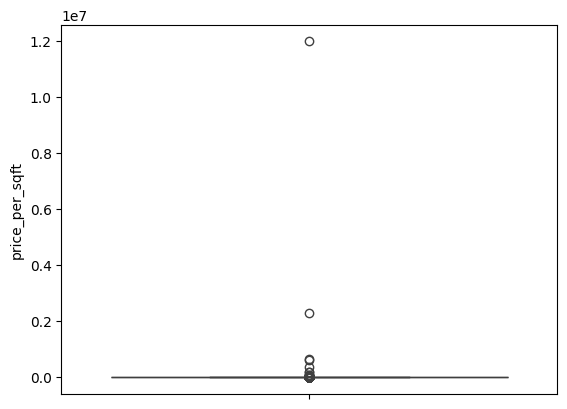

In [16]:
sns.boxplot(df['price_per_sqft'])

In [17]:
# find the outliers
df.loc[(df['price_per_sqft']  > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [18]:
# trimming - delete the outlier data
new_df = df.loc[(df['price_per_sqft']  <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df)-len(new_df))

old data: 13200
new data: 11935
outliers: 1265


<Axes: ylabel='price_per_sqft'>

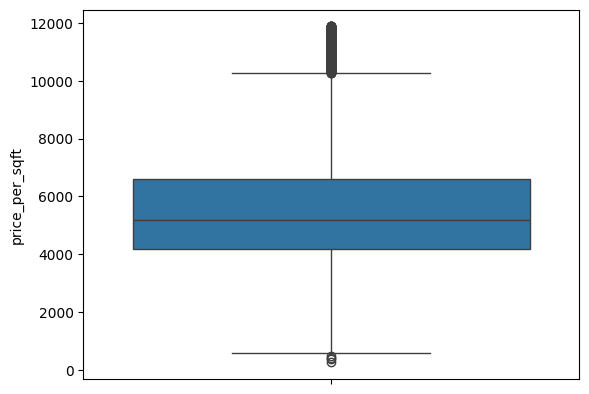

In [19]:
sns.boxplot(new_df['price_per_sqft'])

In [20]:
# capping - change the outlier valuesto upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['price_per_sqft']>upper_limit), 'price_per_sqft'] = upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit), 'price_per_sqft'] = lower_limit
print(new_df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

<Axes: ylabel='price_per_sqft'>

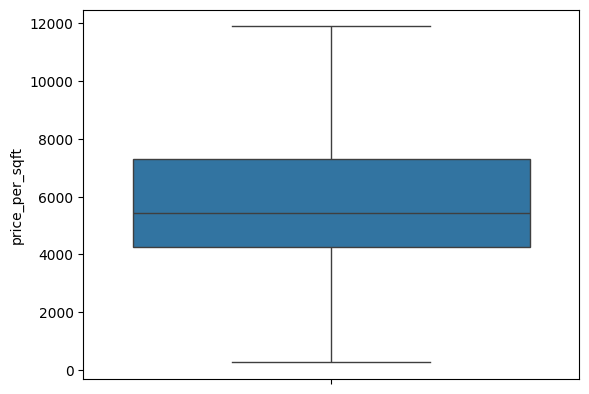

In [21]:
sns.boxplot(new_df['price_per_sqft'])

## Percentile method

In [22]:
upper_limit = df['price_per_sqft'].quantile(0.99)
lower_limit = df['price_per_sqft'].quantile(0.01)
print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 23674.45000000001
lower limit 2549.0


<Axes: ylabel='price_per_sqft'>

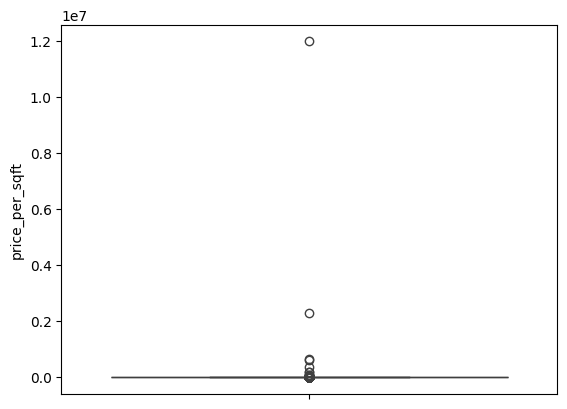

In [23]:
sns.boxplot(df['price_per_sqft'])

In [24]:
# find the outliers
df.loc[(df['price_per_sqft']  > upper_limit) | (df['price_per_sqft'] < lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [25]:
# trimming - delete the outlier data
new_df = df.loc[(df['price_per_sqft']  <= upper_limit) & (df['price_per_sqft'] >= lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outliers:', len(df)-len(new_df))

old data: 13200
new data: 12941
outliers: 259


<Axes: ylabel='price_per_sqft'>

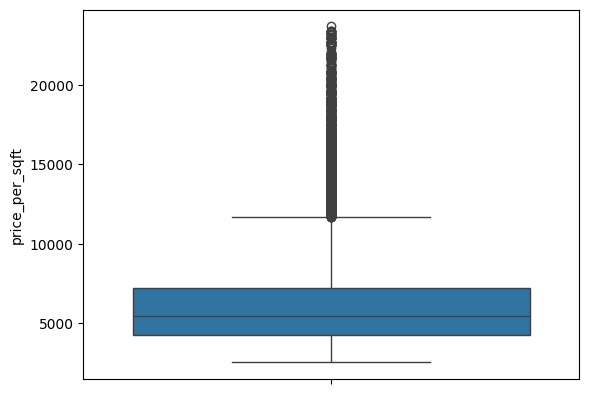

In [26]:
sns.boxplot(new_df['price_per_sqft'])

In [27]:
# capping - change the outlier valuesto upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['price_per_sqft']>upper_limit), 'price_per_sqft'] = upper_limit
new_df.loc[(new_df['price_per_sqft']<lower_limit), 'price_per_sqft'] = lower_limit
print(new_df)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0              3699.0  
1              4615.0  
2  

<Axes: ylabel='price_per_sqft'>

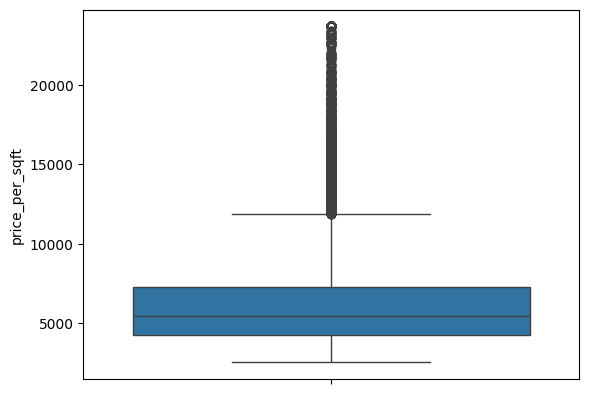

In [28]:
sns.boxplot(new_df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Density'>

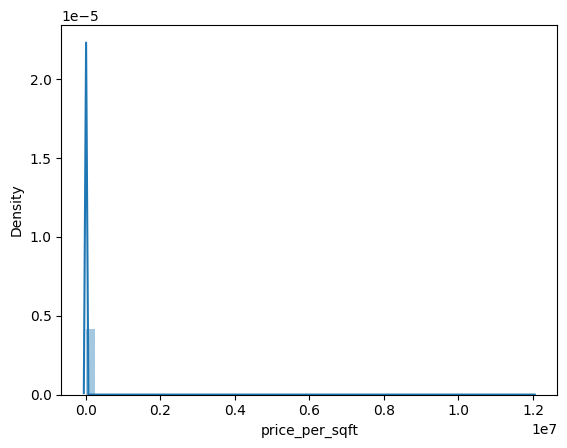

In [33]:
# old distplot
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Density'>

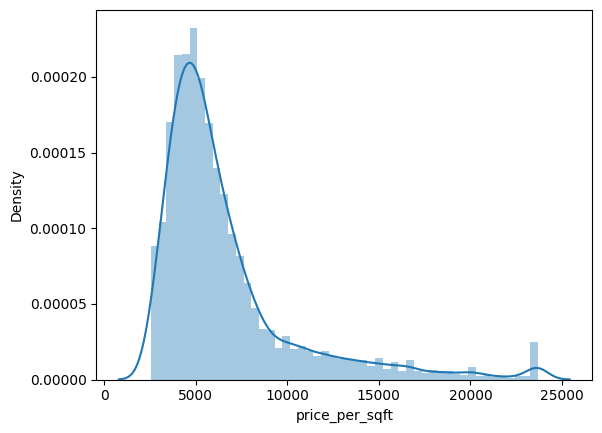

In [30]:
sns.distplot(new_df['price_per_sqft'])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

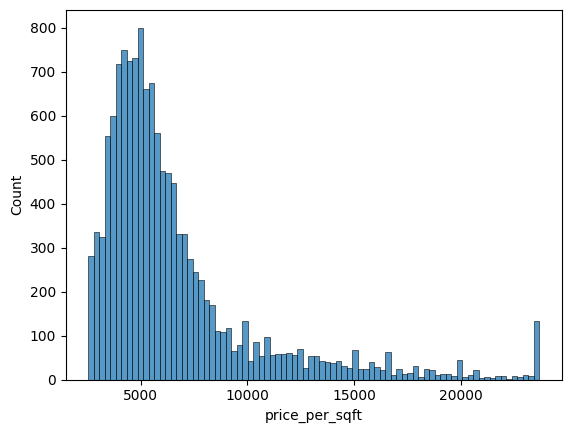

In [31]:
sns.histplot(new_df['price_per_sqft'])

In [39]:
# Calculate Z-scores for 'price_per_sqft' column
z_scores = stats.zscore(df['price_per_sqft'])

# Define a threshold for identifying outliers 
threshold = 3

# Detect outliers
outliers = df[np.abs(z_scores) > threshold]

# Remove outliers
normal_outliers_removed = df[np.abs(z_scores) <= threshold]

# Print the detected outliers
print("Detected outliers:")
print(outliers)

# Print the cleaned dataset after removing outliers
print("\nCleaned dataset after removing outliers:")
print(normal_outliers_removed)

Detected outliers:
             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333

Cleaned dataset after removing outliers:
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...

In [43]:
# Drop non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

In [69]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'location' column
df['location_numerical'] = label_encoder.fit_transform(df['location'])

# Drop the original 'location' column if not needed
df.drop('location', axis=1, inplace=True)

# Now 'location' has been converted to 'location_numerical'
print(df.head())

KeyError: 'location'

In [62]:
df.head(1)

,size,total_sqft,bath,price,bhk,price_per_sqft,location_numerical,bhk_numerical
0,2 BHK,1056.0,2.0,39.07,2,3699,79,1


In [55]:
# Assuming 'bhk' is the categorical column you want to convert to numerical
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'bhk' column
df['bhk_numerical'] = label_encoder.fit_transform(df['bhk'])

# Now 'bhk' has been converted to 'bhk_numerical'
print(df.head())

        size  total_sqft  bath   price  bhk  price_per_sqft  \
0      2 BHK      1056.0   2.0   39.07    2            3699   
1  4 Bedroom      2600.0   5.0  120.00    4            4615   
2      3 BHK      1440.0   2.0   62.00    3            4305   
3      3 BHK      1521.0   3.0   95.00    3            6245   
4      2 BHK      1200.0   2.0   51.00    2            4250   

   location_numerical  bhk_numerical  
0                  79              1  
1                  60              3  
2                 225              2  
3                 159              2  
4                 151              1  


In [63]:
# Extract numerical part from 'size' column and convert to numeric
df['size_numeric'] = df['size'].str.extract('(\d+)').astype(float)

In [66]:
df.head()

,total_sqft,bath,price,bhk,price_per_sqft,location_numerical,bhk_numerical,size_numeric
0,1056.0,2.0,39.07,2,3699,79,1,2.0
1,2600.0,5.0,120.00,4,4615,60,3,4.0
2,1440.0,2.0,62.00,3,4305,225,2,3.0
3,1521.0,3.0,95.00,3,6245,159,2,3.0
4,1200.0,2.0,51.00,2,4250,151,1,2.0


In [65]:
df.drop('size', axis=1, inplace=True)

In [67]:
# Check the correlation between all numerical columns
correlation_matrix = df.corr()

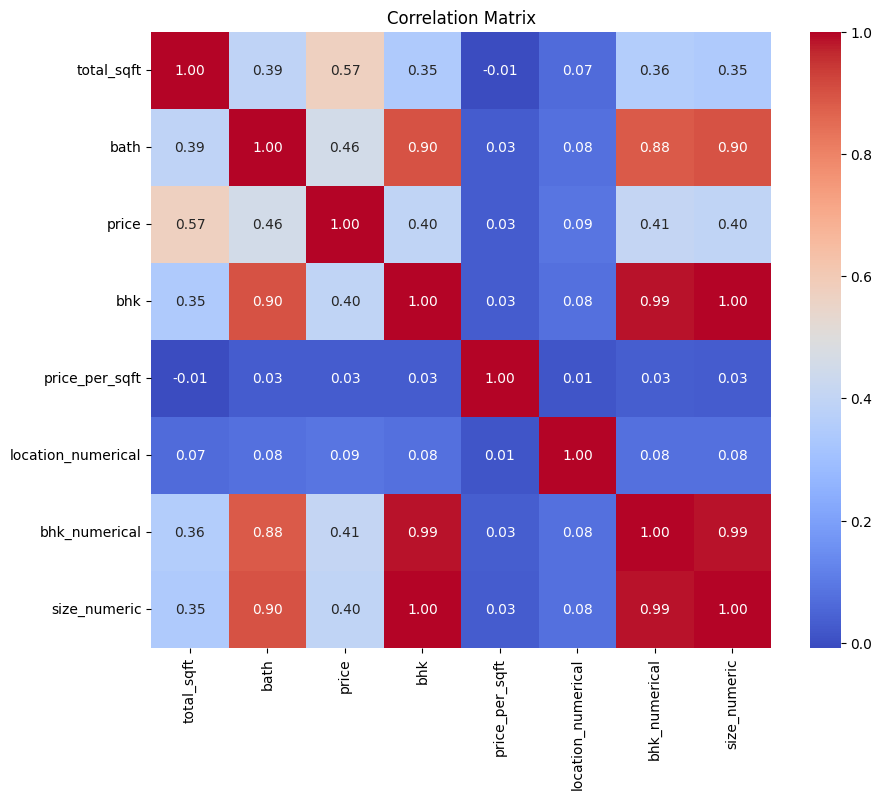

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Create scatter plots between variables
sns.pairplot(df)
plt.show()